In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "housing.csv"
df = pd.read_csv(file_path)

In [2]:
# Display dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

Dataset contains 20640 rows and 10 columns.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Check for missing values
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [7]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [8]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [9]:
# Unique values count for categorical columns
cat_features = df.select_dtypes(include=['object']).columns
for col in cat_features:
    print(f"\nUnique values in '{col}': {df[col].nunique()}")
    print(df[col].value_counts().head(10))


Unique values in 'ocean_proximity': 5
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

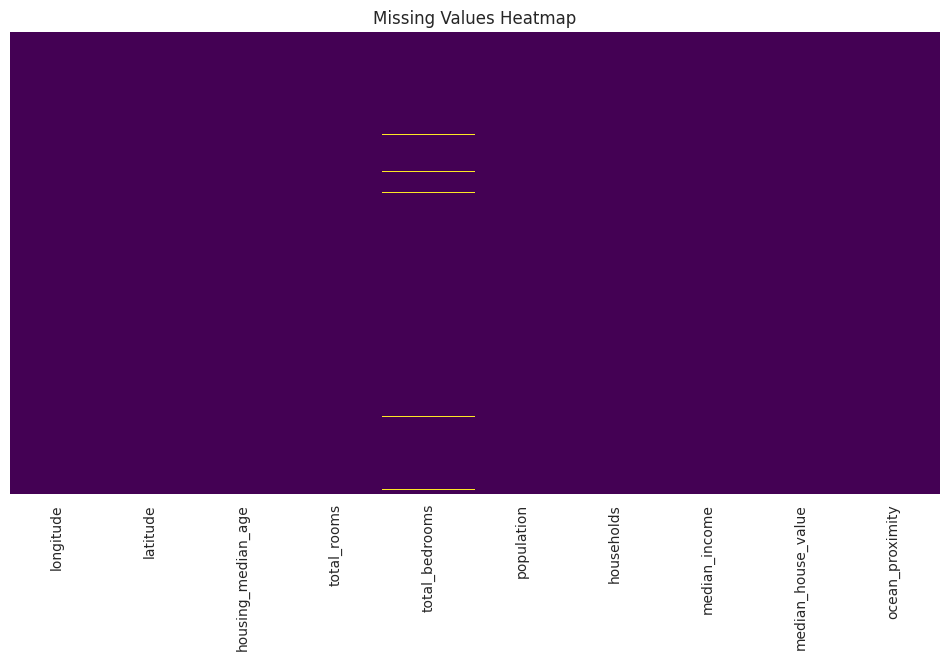

In [11]:
# 1. Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

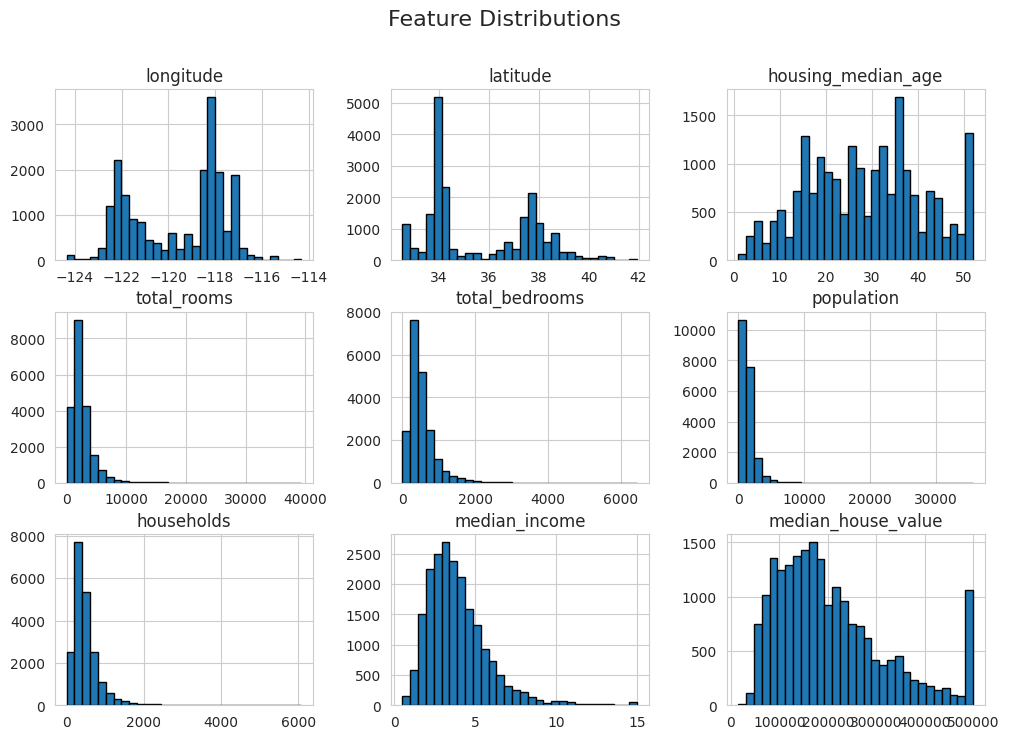

In [12]:
# 2. Histograms for numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

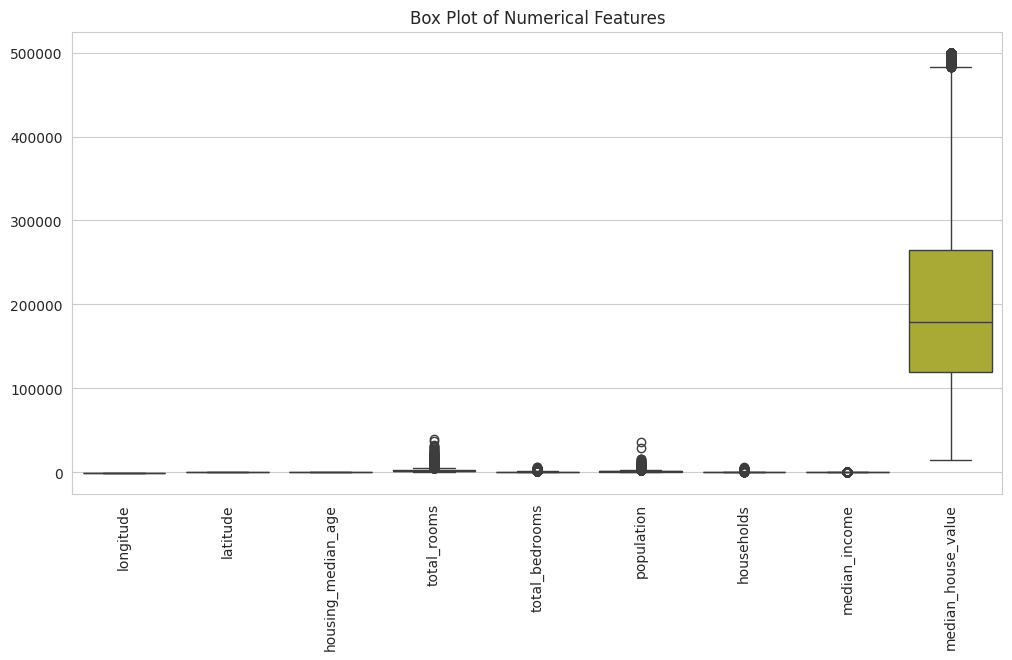

In [13]:
# 4. Box plots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=["int64", "float64"]))
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features")
plt.show()

In [14]:
from sklearn.impute import SimpleImputer

# 1. Handling Missing Values
# Separate numerical & categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

In [15]:
# Fill numerical columns with Median
imputer_num = SimpleImputer(strategy="median")
df[num_cols] = imputer_num.fit_transform(df[num_cols])

In [16]:
# Fill categorical columns with Mode
imputer_cat = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [17]:
# Verify that no missing values remain
print("\nMissing Values After Imputation:")
df.isnull().sum()


Missing Values After Imputation:


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [18]:
# 2. Handling Outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [19]:
# Define upper and lower limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
# Remove outliers
df_cleaned = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]

In [21]:
print(f"\nOriginal Dataset Shape: {df.shape}")
print(f"Cleaned Dataset Shape (After Outlier Removal): {df_cleaned.shape}")


Original Dataset Shape: (20640, 10)
Cleaned Dataset Shape (After Outlier Removal): (17609, 10)


In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# 1. One-Hot Encoding for categorical features (if necessary)
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

In [23]:
from sklearn.preprocessing import LabelEncoder

# Get categorical columns that are still in original form (not one-hot encoded)
label_encoders = {}
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
    else:
        print(f" Skipping '{col}' as it is already one-hot encoded.")


 Skipping 'ocean_proximity' as it is already one-hot encoded.


In [24]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [25]:
# 3. Feature Scaling (Standardization)
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


Highly Correlated Features:
                            longitude  latitude  housing_median_age  \
longitude                    1.000000  0.923399                 NaN   
latitude                     0.923399  1.000000                 NaN   
housing_median_age                NaN       NaN                 1.0   
total_rooms                       NaN       NaN                 NaN   
total_bedrooms                    NaN       NaN                 NaN   
population                        NaN       NaN                 NaN   
households                        NaN       NaN                 NaN   
median_income                     NaN       NaN                 NaN   
median_house_value                NaN       NaN                 NaN   
ocean_proximity_INLAND            NaN       NaN                 NaN   
ocean_proximity_ISLAND            NaN       NaN                 NaN   
ocean_proximity_NEAR BAY          NaN       NaN                 NaN   
ocean_proximity_NEAR OCEAN        NaN       NaN 

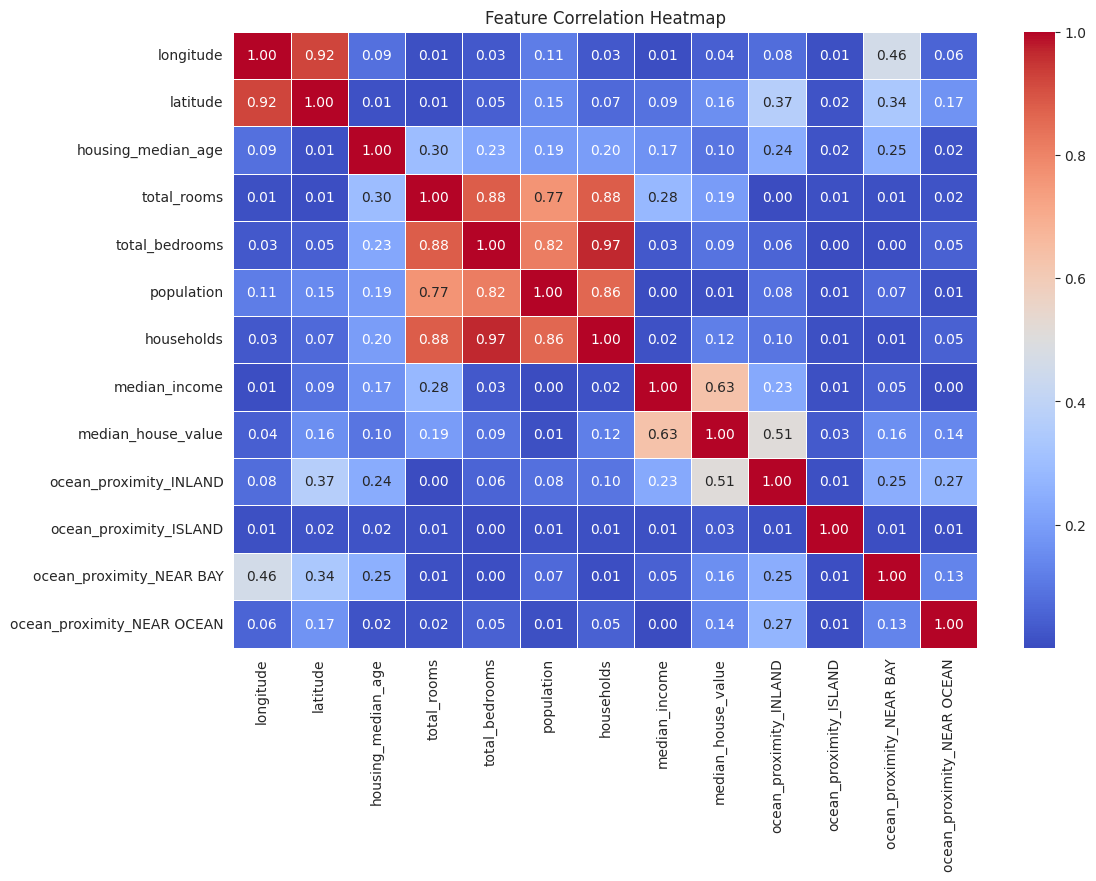

In [26]:
# 4. Correlation-Based Feature Selection
corr_matrix = df_encoded.corr().abs()
high_corr_features = corr_matrix[corr_matrix > 0.8]
print("\nHighly Correlated Features:")
print(high_corr_features)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
# Set the correlation threshold
corr_threshold = 0.8

# Create a set to hold features to drop
features_to_drop = set()

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            features_to_drop.add(colname)

# Drop the identified features
df_selected = df_encoded.drop(columns=features_to_drop)

# Print the updated feature set
print("Dropped Features:", features_to_drop)
print("Remaining Features:", df_selected.columns)


Dropped Features: {'population', 'total_bedrooms', 'latitude', 'households'}
Remaining Features: Index(['longitude', 'housing_median_age', 'total_rooms', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
# 1. Split Data into Train & Test Sets
X = df_encoded.drop(columns=["median_house_value"])
y = df_encoded["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save the datasets to CSV files
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

print("Train and Test datasets saved!")

Train and Test datasets saved!


In [30]:
# 2. Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

In [31]:
# 3. Train & Evaluate Models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

In [32]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                        MAE      RMSE  R2 Score
Linear Regression  0.461252  0.628801  0.620018
Decision Tree      0.430474  0.649138  0.595042
Random Forest      0.311461  0.470646  0.787124
XGBoost            0.307755  0.463591  0.793459


In [33]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [34]:
# Define hyperparameter search space
param_dist = {
    "n_estimators": [100, 300, 500, 700, 1000],
    "max_depth": [3, 5, 7, 9, 12],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3, 0.5]
}

In [35]:
# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [36]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)
random_search.fit(X_train, y_train)  # Try running this after fix


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.8,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 9, 12],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000],
                                        'subsample': [0.5, 0.7, 0.8, 1.0]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [37]:
# Best parameters from RandomizedSearchCV
best_params_random = random_search.best_params_
print("\nBest Parameters from RandomizedSearchCV:", best_params_random)


Best Parameters from RandomizedSearchCV: {'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 12, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}


In [38]:
# Train model with best hyperparameters
optimized_model_xg = xgb.XGBRegressor( objective="reg:squarederror",**best_params_random,random_state=42)
optimized_model_xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
# Evaluate Model
y_pred_xg = optimized_model_xg.predict(X_test)

In [40]:
mae = mean_absolute_error(y_test, y_pred_xg)
mse = mean_squared_error(y_test, y_pred_xg)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_xg)

In [41]:
print("\nOptimized Model Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


Optimized Model Performance:
MAE: 0.29077935700042123
RMSE: 0.4468414362814247
R² Score: 0.8081139054881087


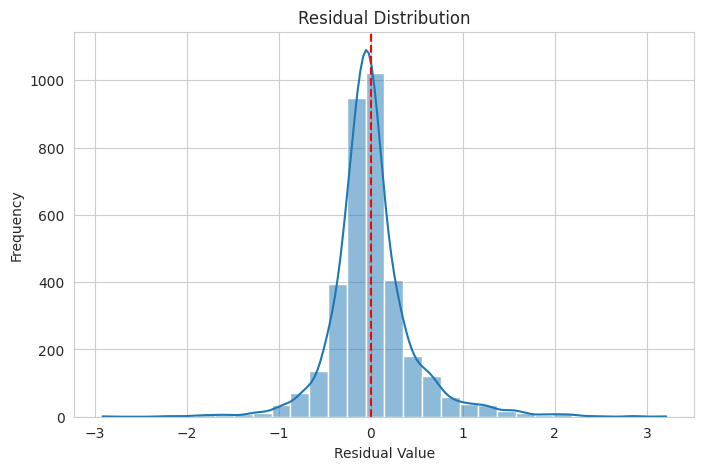

In [42]:
# 2. Residual Analysis
residuals = y_test - y_pred_xg

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='red', linestyle='dashed')
plt.title("Residual Distribution")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

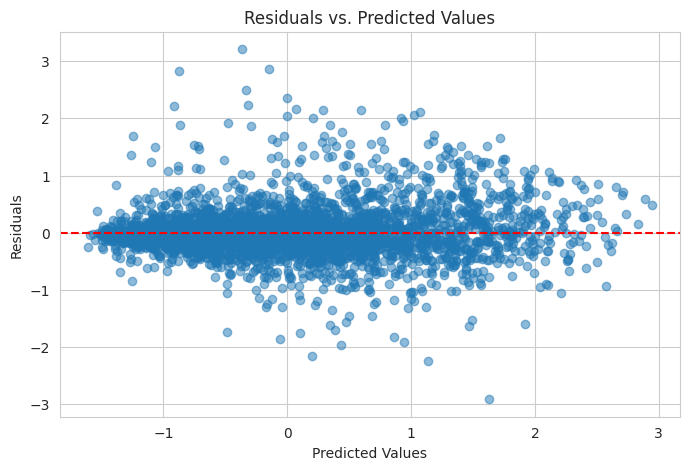

In [43]:
import matplotlib.pyplot as plt

# Predicted vs Residual plot
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

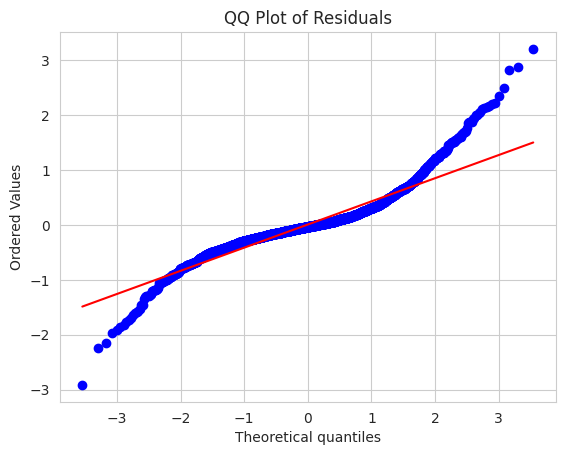

In [44]:
import scipy.stats as stats
import numpy as np

# QQ Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

In [45]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test Statistic: 0.8917288037980533, p-value: 2.1950897576356425e-44


In [48]:
import joblib
import os

# Create a directory to store model artifacts
os.makedirs("artifacts", exist_ok=True)

# Save the trained model
joblib.dump(optimized_model_xg, "best_model.pkl")

# Save the feature scaler
joblib.dump(scaler, "scaler.pkl")

# Save label encoders if needed
joblib.dump(label_encoders, "artifacts/label_encoders.pkl")

print("\nModel and preprocessing artifacts saved successfully!")


Model and preprocessing artifacts saved successfully!
